# <font color="#099ffc">**Boston Airbnb Dataset**</font>


---



<font color="#03254c">Множеството се однесува на апратмани кои се понудени за изнајмување преку Airbnb во градот Бостон. Истото се состои од 3 подмножества и тоа: 


*   **Calendar** - се состои од апартманите со нивни описи и датуми за изнајмување, при што за секој датум има соодветен запис во колона Достапност, true/false во зависност од тоа дали е изнајмен тогаш или не. 
*   **Listings** - табела која ги содржи сите важни податоци поврзани со еден апартман. Како поважен може да се споменене генералниот рејтинг.
*   **Reviews** - ги содржи сите коментари за даден апартман, како и кој го оставил коментарот и на кој датум. </font>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
listings= pd.read_csv("/content/drive/MyDrive/listings.csv")
listings
# number_of_reviews,review_scores_rating,review_scores_value

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$65.00,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,moderate,f,f,1

In [ ]:
ds_reviews=pd.read_csv("/content/drive/MyDrive/reviews.csv")
ds_reviews
# site  id se odnesuvaat na eden id od listata

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...


In [ ]:
ds_calendar=pd.read_csv("/content/drive/MyDrive/calendar.csv")
ds_calendar

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN


<font color="#03254c">Функција за претпроцесирање на текст, односно се подготвуваат коментарите за понатамошна обработка, при што се применуваат операции како отстранување на т.н stop words, бришење на интерпункциски знаци, намалување на големите букви, лематизација, токенизација и сл. </font>

In [ ]:
import matplotlib.pyplot as plt
import string # за препроцесирање
import re # за препроцесирање
import nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords # за препроцесирање
from nltk.stem import WordNetLemmatizer # за препроцесирање
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression # моделот 
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# бришење на url, тагови
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text
# сите мали букви
def text_lowercase(text):
    return text.lower()
# отстранување бројки
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result
# бришење интерпункција
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
# токенизација
def tokenize(text):
    text = word_tokenize(text)
    return text
# бришење stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text
# лематизација
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

In [ ]:
pp_text = [] # новата препорцесирана колона
ds_reviews.comments = ds_reviews.comments.astype(str)

for text_data in ds_reviews['comments']:
    pp_text_data = preprocessing(text_data)
    pp_text.append(pp_text_data)

ds_reviews['pp_text'] = pp_text # додавање на процесираната колона 

In [ ]:
ds_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments,pp_text
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,stay islam place really cool good location min...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,great location airport city great amenity hous...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,really enjoyed stay islam house outside house ...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,room nice clean commodity close airport metro ...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,great location min walk airport station good f...
...,...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...,joe su mujer son encantadores la habitaci n e ...
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...,joe way jamaica married last day three day sta...
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...,room clean bathroom kitchen bed also comfortab...
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...,staying lower allston joe nancy place fantasti...


<font color="#03254c">Главната задача на проектот беше *да се провери дали постои сооднос или корелација помеѓу бројот на коментари и честотата на изнајмување за даден апартман*. Со цел да го направиме ова, потребно беше да се дојде до податоците за тоа колку позитивни, негативни или неутрални коментари има за даден апартман и да се види колку пати бил изнајмуван истиот. 

Со оглед на тоа дека коментарите не беа лабелирани, моравме да направиме *сентимент анализа* со ненадгледувано учење, при што искористивме две библиотеки: *VADER и TextBlob*. Како резултат, добивме три модели, односно 3 класификации.</font>


---



<font color="#099ffc">**Сентимент анализа со VADER(Valence Aware Dictionary and Sentiment Reasoner)**</font>


---


<font color="#03254c">Сентимент анализа со VADER (Valence Aware Dictionary and Sentiment Reasoner). VADER е лексикон и алатка за сентимент анализа базирана на правила. Се користи за да анализира сентимент на даден текст. Лексиконот е листа на зборови коишто се лабелирани како позитивни или негативни базирано на семантичко значење. Предноста, а воедно и причината зошто го употребивме, е можноста за сентимент анализа на нелабелирани текстуални податоци којашто ја нуди VADER.</font>




In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 4.2MB/s 


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
analyzer=SentimentIntensityAnalyzer()

In [ ]:
analyzer.polarity_scores(ds_reviews.comments[100])

In [ ]:
analyzer.polarity_scores(ds_reviews.pp_text[100])

In [ ]:
# 	listing_id,id,comments,neg,pos,neu,compound
newtable=pd.DataFrame({'listing_id' : ds_reviews.listing_id, 
                   'id' : ds_reviews.id,
                   'comments':ds_reviews.comments})

In [ ]:
newtable.head()

,listing_id,id,comments
0,1178162,4724140,My stay at islam's place was really cool! Good...
1,1178162,4869189,Great location for both airport and city - gre...
2,1178162,5003196,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,The room was nice and clean and so were the co...
4,1178162,5171140,Great location. Just 5 mins walk from the Airp...


In [ ]:
newtable['neg'] = newtable['comments'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
newtable['neu'] = newtable['comments'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
newtable['pos'] = newtable['comments'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
newtable['compound'] = newtable['comments'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
newtable

,listing_id,id,comments,neg,neu,pos,compound
0,1178162,4724140,My stay at islam's place was really cool! Good...,0.000,0.648,0.352,0.9626
1,1178162,4869189,Great location for both airport and city - gre...,0.000,0.639,0.361,0.9061
2,1178162,5003196,We really enjoyed our stay at Islams house. Fr...,0.000,0.767,0.233,0.9663
3,1178162,5150351,The room was nice and clean and so were the co...,0.000,0.673,0.327,0.9267
4,1178162,5171140,Great location. Just 5 mins walk from the Airp...,0.000,0.637,0.363,0.8658
...,...,...,...,...,...,...,...
68270,7462268,80537457,Joe y su mujer son encantadores. La habitación...,0.000,0.946,0.054,0.3400
68271,7462268,83640094,Joe was on his way to Jamaica to be married! o...,0.014,0.822,0.164,0.9504
68272,7462268,85797088,The room was very clean as were the bathrooms ...,0.000,0.784,0.216,0.9693
68273,7462268,97264637,Staying in Lower Allston at Joe and Nancy's pl...,0.014,0.759,0.226,0.9957



<font color="#03254c">Класифицирање на апартмани според број на: 

*   **Позитивни** - се сметаат оние со compound > 0.05.
*   **Неутрални** - се сметаат оние со compound <= 0.05 и compound >= -0.05.
*   **Негативни** - се сметаат оние со compound < -0.05.</font>

In [ ]:
newtable['class'] = np.where(newtable['compound'] > 0.05, 1, np.where(
    newtable['compound'] < -0.05, -1, 0))
newtable.head()


,listing_id,id,comments,neg,neu,pos,compound,class
0,1178162,4724140,My stay at islam's place was really cool! Good...,0.0,0.648,0.352,0.9626,1
1,1178162,4869189,Great location for both airport and city - gre...,0.0,0.639,0.361,0.9061,1
2,1178162,5003196,We really enjoyed our stay at Islams house. Fr...,0.0,0.767,0.233,0.9663,1
3,1178162,5150351,The room was nice and clean and so were the co...,0.0,0.673,0.327,0.9267,1
4,1178162,5171140,Great location. Just 5 mins walk from the Airp...,0.0,0.637,0.363,0.8658,1


In [ ]:
 newtable[newtable["class"] == 0]

,listing_id,id,comments,neg,neu,pos,compound,class
15,1178162,11069185,"The room was exactly as pictured, no frills, y...",0.117,0.767,0.116,-0.0023,0
50,1178162,20020224,La maison située dans East Boston était sympat...,0.000,1.000,0.000,0.0000,0
55,1178162,20513074,"De kamer wordt verhuurd via een ""self-check in...",0.000,1.000,0.000,0.0000,0
65,1178162,21857003,had everything needed!,0.000,1.000,0.000,0.0000,0
134,1178162,38361181,Muy buena ubicación si se viene desde el aerop...,0.000,1.000,0.000,0.0000,0
...,...,...,...,...,...,...,...,...
68113,10328539,90061439,Nos sentimos muy a gusto con Gisel y su marido.,0.000,1.000,0.000,0.0000,0
68173,6377998,49871548,The host canceled this reservation 3 days befo...,0.000,1.000,0.000,0.0000,0
68230,6425405,37493496,Notre hôte avait bien préparé notre arrivée et...,0.000,1.000,0.000,0.0000,0
68246,7462268,43471157,The host canceled this reservation 13 days bef...,0.000,1.000,0.000,0.0000,0


In [ ]:
newtable[newtable["class"] == -1]

,listing_id,id,comments,neg,neu,pos,compound,class
12,1178162,8372308,Mi estadía en Boston aunque corta fue muy buen...,0.090,0.910,0.000,-0.4184,-1
17,1178162,11420562,Izzy was great... had clear instructions and n...,0.344,0.546,0.109,-0.6802,-1
24,1178162,12753057,We didn´t meet Izzy at all!!!! After we arrive...,0.138,0.787,0.075,-0.7798,-1
58,1178162,21219502,The house was in a very convenient location to...,0.057,0.895,0.049,-0.0765,-1
64,1178162,21809402,Parking situation was bad. Very hard to find ...,0.226,0.622,0.152,-0.2982,-1
...,...,...,...,...,...,...,...,...
68161,2794782,39353858,The pictures accurately reflected the interior...,0.067,0.878,0.055,-0.3726,-1
68167,2794782,70739207,"Steven ist ein sehr hilfsbereiter , freun...",0.072,0.928,0.000,-0.4019,-1
68177,6377998,63240208,Helder was super helpful with coordinating our...,0.124,0.721,0.156,-0.3170,-1
68228,9885963,85132568,"I would highly recommend this airbnb, especial...",0.162,0.741,0.096,-0.7929,-1


In [ ]:
newtable[newtable["class"] == 1]

,listing_id,id,comments,neg,neu,pos,compound,class
0,1178162,4724140,My stay at islam's place was really cool! Good...,0.000,0.648,0.352,0.9626,1
1,1178162,4869189,Great location for both airport and city - gre...,0.000,0.639,0.361,0.9061,1
2,1178162,5003196,We really enjoyed our stay at Islams house. Fr...,0.000,0.767,0.233,0.9663,1
3,1178162,5150351,The room was nice and clean and so were the co...,0.000,0.673,0.327,0.9267,1
4,1178162,5171140,Great location. Just 5 mins walk from the Airp...,0.000,0.637,0.363,0.8658,1
...,...,...,...,...,...,...,...,...
68270,7462268,80537457,Joe y su mujer son encantadores. La habitación...,0.000,0.946,0.054,0.3400,1
68271,7462268,83640094,Joe was on his way to Jamaica to be married! o...,0.014,0.822,0.164,0.9504,1
68272,7462268,85797088,The room was very clean as were the bathrooms ...,0.000,0.784,0.216,0.9693,1
68273,7462268,97264637,Staying in Lower Allston at Joe and Nancy's pl...,0.014,0.759,0.226,0.9957,1


<font color="#03254c">*Boxplot визуелизација* со цел да воочиме во кои интервали ни се наоѓале вредностите за compound за секој коментар во однос на класата во која припаѓа.</font>

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


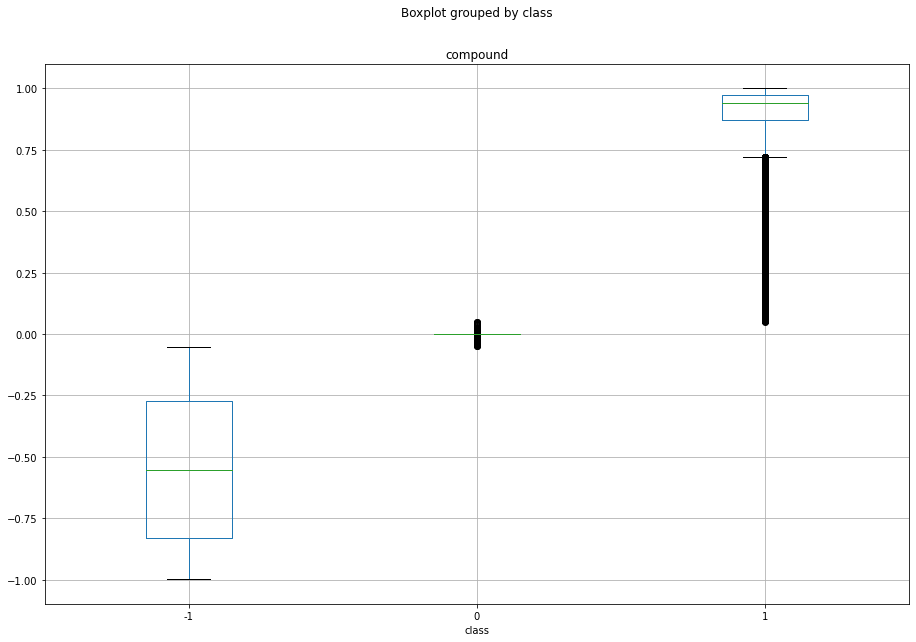

In [ ]:
newtable.boxplot(by='class', column='compound', figsize=(15,10))

In [ ]:
# grupiranje na apartani spored listing_id, na br_pozitivni,br_nedativni,br_neutralni
#if need also category c with no values of 'one'

apartment_negative = newtable.groupby('listing_id')['class'].apply(lambda x: (x== -1).sum()).reset_index(name='number_negative')
apartment_possitive = newtable.groupby('listing_id')['class'].apply(lambda x: (x== 1).sum()).reset_index(name='number_positive')
apartment_neutral = newtable.groupby('listing_id')['class'].apply(lambda x: (x== 0).sum()).reset_index(name='number_neutral')

In [ ]:
apartment_negative

,listing_id,number_negative
0,3353,2
1,5506,0
2,6695,2
3,6976,0
4,8792,0
...,...,...
2824,14813006,0
2825,14823724,0
2826,14842237,0
2827,14843050,0


In [ ]:
apartment_possitive.listing_id.size

2829

In [ ]:
apartment_neutral.listing_id.size

2829

In [ ]:
concatenated = pd.merge(apartment_possitive, apartment_negative)

In [ ]:
concatenated = pd.merge(concatenated, apartment_neutral)

In [ ]:
concatenated

,listing_id,number_positive,number_negative,number_neutral
0,3353,32,2,0
1,5506,35,0,1
2,6695,45,2,0
3,6976,40,0,1
4,8792,18,0,0
...,...,...,...,...
2824,14813006,1,0,0
2825,14823724,1,0,0
2826,14842237,0,0,1
2827,14843050,1,0,1


In [ ]:
ds_reserved = ds_calendar[ds_calendar["available"] == "f"]   # filtriranje na tie sto se rezervirani 
apartment_count = ds_reserved.groupby('listing_id')['date'].count().reset_index(name='times_reserved') # tuka apartman | na kolku dati e iznajmen (pati ustvari)


In [ ]:
apartment_count

,listing_id,times_reserved
0,3353,116
1,5506,21
2,6695,41
3,6976,46
4,8792,117
...,...,...
3477,14918425,23
3478,14924831,299
3479,14928333,26
3480,14933380,284


In [ ]:
finalresult = pd.merge(apartment_count,
                 concatenated,
                 on='listing_id', 
                 how='left')

In [ ]:
finalresult

,listing_id,times_reserved,number_positive,number_negative,number_neutral
0,3353,116,32.0,2.0,0.0
1,5506,21,35.0,0.0,1.0
2,6695,41,45.0,2.0,0.0
3,6976,46,40.0,0.0,1.0
4,8792,117,18.0,0.0,0.0
...,...,...,...,...,...
3477,14918425,23,NaN,NaN,NaN
3478,14924831,299,NaN,NaN,NaN
3479,14928333,26,NaN,NaN,NaN
3480,14933380,284,NaN,NaN,NaN


In [ ]:
# review_scores_rating id,
listings1=listings.rename(columns={'id': 'listing_id'})
result = pd.merge(listings1[['listing_id','review_scores_rating']],
                 finalresult,
                 on='listing_id', 
                 how='left')

<font color="#03254c">Табелата во продолжение, именувана како result, е крајната табела, која ги содржи апартманите со нивниот просечен рејтинг, број пати на резервирање, број на позитивни, неутрални и негативни коментари. Оваа табела во некои од колоните содржи NaN вредности и тоа е така поради фактот што множеството содржи и апартмани кои не биле изнајмени ниту еднаш или пак нема оставено никакви коментари за нив.</font>

In [ ]:
result

,listing_id,review_scores_rating,times_reserved,number_positive,number_negative,number_neutral
0,12147973,NaN,365.0,NaN,NaN,NaN
1,3075044,94.0,6.0,34.0,1.0,1.0
2,6976,98.0,46.0,40.0,0.0,1.0
3,1436513,100.0,267.0,1.0,0.0,0.0
4,7651065,99.0,31.0,25.0,1.0,3.0
...,...,...,...,...,...,...
3580,8373729,90.0,9.0,4.0,0.0,0.0
3581,14844274,NaN,1.0,NaN,NaN,NaN
3582,14585486,NaN,325.0,NaN,NaN,NaN
3583,14603878,90.0,112.0,2.0,0.0,0.0


<font color="#03254c">*Матрица на корелација*, која е направена со цел да се види корелацијата помеѓу секој пар на променливи. Од неа може да се види дека помеѓу бројот на негативни коментари и бројот на пати на изнајмување нема силна корелација, но сепак постои некаква. Од ова може да се заклучи дека на одлуката за изнајмување на даден апартман на луѓето влијаел само генералниот рејтинг, односно тие како повеќе внимание да обрнувале само на него.</font>

In [ ]:
correlation_matrix=result.corr

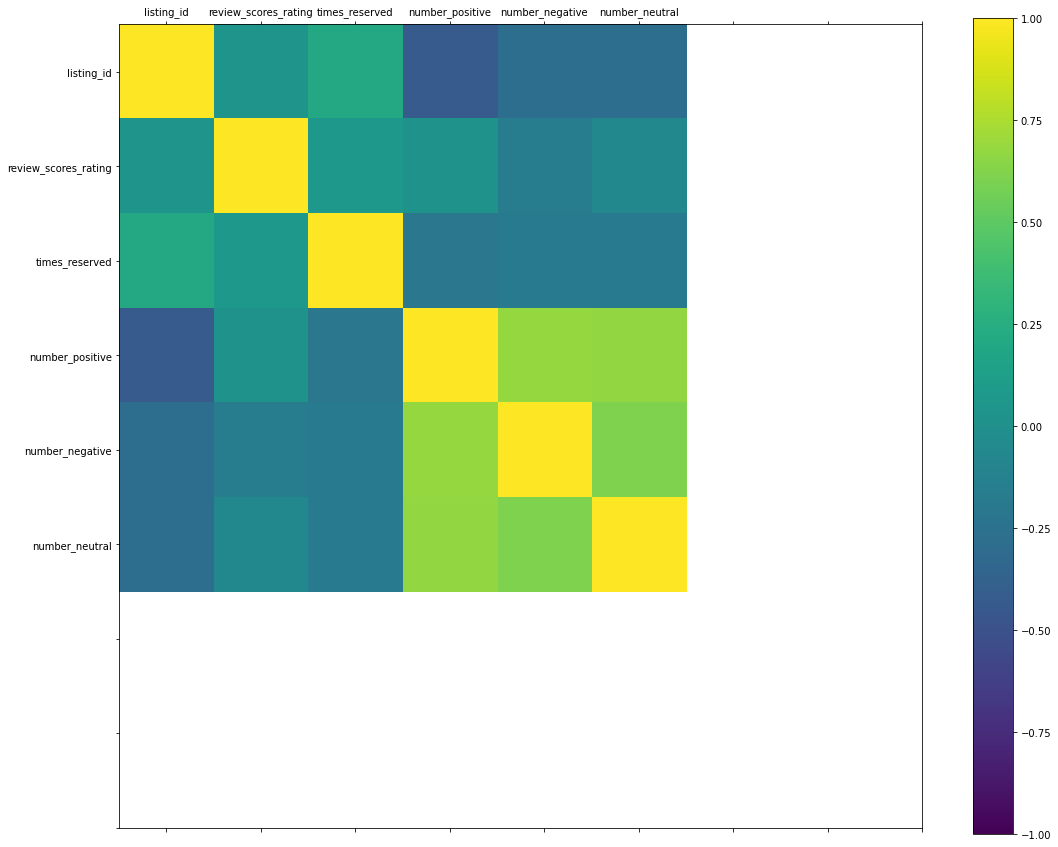

In [ ]:
import matplotlib.pyplot as plt

names = result.columns
correlations = result.corr()
# plot correlation matrix
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

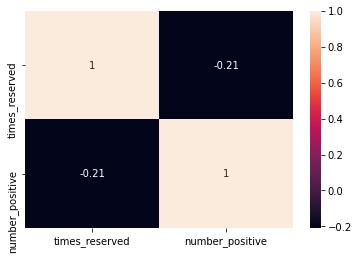

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


df = pd.DataFrame(result,columns=['times_reserved','number_positive'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

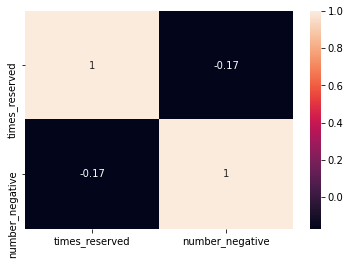

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


df = pd.DataFrame(result,columns=['times_reserved','number_negative'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

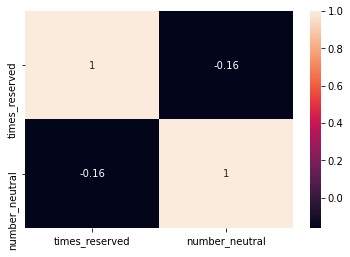

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


df = pd.DataFrame(result,columns=['times_reserved','number_neutral'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

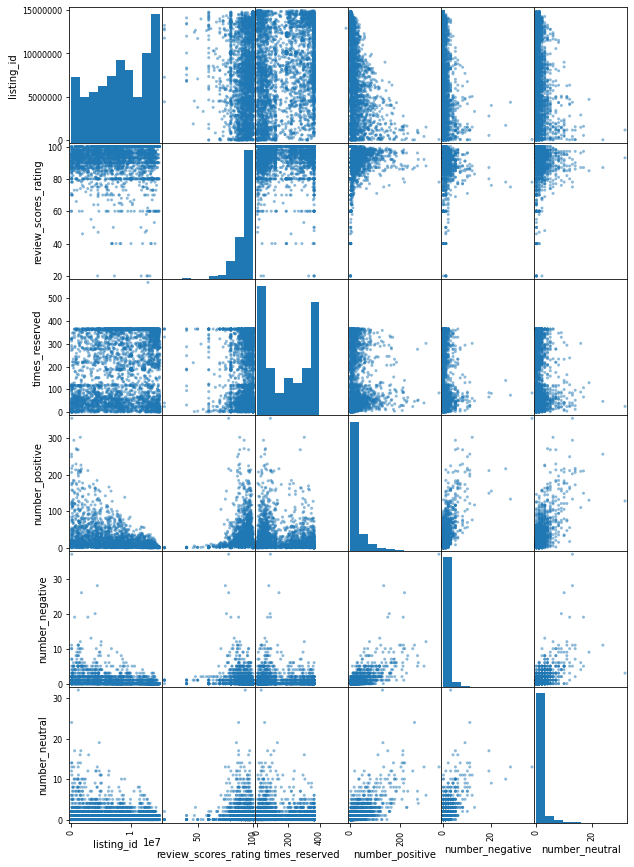

In [ ]:
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix
names = result.columns
scatter_matrix(result, figsize=(10, 15))
plt.show()

In [ ]:
corr=result.corr()

In [ ]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Correlation matrix")\
    .set_precision(2)\
    .set_table_styles(magnify())

,listing_id,review_scores_rating,times_reserved,number_positive,number_negative,number_neutral
listing_id,1.00,0.03,0.21,-0.42,-0.28,-0.27
review_scores_rating,0.03,1.00,0.07,0.03,-0.16,-0.06
times_reserved,0.21,0.07,1.00,-0.21,-0.17,-0.16
number_positive,-0.42,0.03,-0.21,1.00,0.68,0.68
number_negative,-0.28,-0.16,-0.17,0.68,1.00,0.62
number_neutral,-0.27,-0.06,-0.16,0.68,0.62,1.00


<font color="#03254c">Разгледувајќи ги сите погоре дадени коефициенти на корелација, како и Scatterplot визуелизацијата на истите, може да се увиди дека генерално и позитивните и негативните не влијаат премногу, но дека во споредба со позитивните негативните повеќе влијаат на одлуката за изнајмување. 

Од друга страна, *ако ги разгледуваме бројот на позитивните коментари и review score rating-ot, можеме да увидиме дека се поврзани, како што се поврзани и review scores rating-от и бројот на пати на изнајмување. Оттука, може да се заклучи дека индиректно бројот на позитивни коментари влијае на изнајменоста на апартманот.*</font>


<font color="#099ffcfc">**Сентимент анализа со TextBlob**





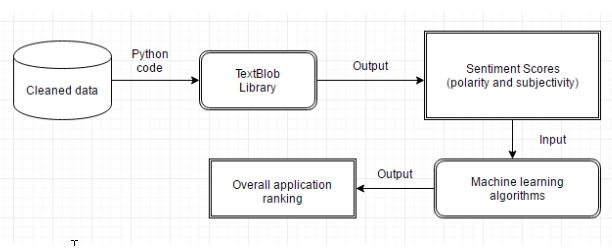




<font color="#03254c">Класификацијата кај TextBlob  се врши врз основа на своиството polarity:



*   **Позитивно**- polarity > 0
*   **Негативно**- polarity < 0
* **Неутрално**- polarity == 0</font>




In [ ]:
ds_reviews1 = pd.read_csv('/content/drive/MyDrive/reviews.csv')
ds_calendar1 = pd.read_csv('/content/drive/MyDrive/calendar.csv')
ds_listings1 = pd.read_csv('/content/drive/MyDrive/listings.csv')
from textblob import TextBlob

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

ds_reviews1.comments = ds_reviews1.comments.astype(str)

ds_reviews1['Polarity'] = ds_reviews1['comments'].apply(get_polarity)
ds_reviews1['Class']=''
ds_reviews1.loc[ds_reviews1.Polarity >0 ,'Class']='POSITIVE'
ds_reviews1.loc[ds_reviews1.Polarity==0,'Class']='NEUTRAL'
ds_reviews1.loc[ds_reviews1.Polarity<0,'Class']='NEGATIVE'

In [ ]:
ds_reviews2=pd.read_csv('/content/drive/MyDrive/reviews.csv')
# ds_reviews2=ds_reviews1.copy()

In [ ]:
ds_reviews1

,listing_id,id,date,reviewer_id,reviewer_name,comments,Polarity,Class
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,0.388021,POSITIVE
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,0.600000,POSITIVE
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,0.200521,POSITIVE
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,0.383333,POSITIVE
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,0.466667,POSITIVE
...,...,...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...,0.000000,NEUTRAL
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...,0.218483,POSITIVE
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...,0.381515,POSITIVE
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...,0.328030,POSITIVE


In [ ]:
len(ds_reviews1[ds_reviews1["Class"] == 'NEGATIVE'])

871

In [ ]:
ds_reviews1[ds_reviews1["Class"] == 'NEGATIVE'].head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,Polarity,Class
20,1178162,11901870,2014-04-18,578962,Samir,Izzy was a nice and helpful host with detailed...,-0.069753,NEGATIVE
24,1178162,12753057,2014-05-10,14113353,Chris,We didn´t meet Izzy at all!!!! After we arrive...,-0.507542,NEGATIVE
46,1178162,18696958,2014-08-30,15346724,Stephen,Izzy's home is conveniently located for anyone...,-0.018182,NEGATIVE
59,1178162,21303347,2014-10-14,21630508,Linda,Hard tofind parking. One night's sleep is alr...,-0.097222,NEGATIVE
64,1178162,21809402,2014-10-24,22554506,Claude,Parking situation was bad. Very hard to find ...,-0.225045,NEGATIVE


In [ ]:
len(ds_reviews1[ds_reviews1["Class"] == 'NEUTRAL'])

3711

In [ ]:
len(ds_reviews1[ds_reviews1["Class"] == 'POSITIVE'])

63693

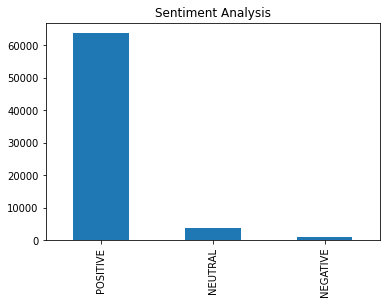

In [ ]:
ds_reviews1.Class.value_counts().plot(kind='bar',title="Sentiment Analysis")

In [ ]:
negative = ds_reviews1.groupby('listing_id')['Class'].apply(lambda x: (x== 'NEGATIVE').sum()).reset_index(name='number_negative')
possitive = ds_reviews1.groupby('listing_id')['Class'].apply(lambda x: (x== 'POSITIVE').sum()).reset_index(name='number_positive')
neutral = ds_reviews1.groupby('listing_id')['Class'].apply(lambda x: (x== 'NEUTRAL').sum()).reset_index(name='number_neutral')

In [ ]:
concatenated1 = pd.merge(negative, possitive)

In [ ]:
concatenated1 = pd.merge(concatenated1, neutral)

In [ ]:
concatenated1

,listing_id,number_negative,number_positive,number_neutral
0,3353,1,32,1
1,5506,0,35,1
2,6695,0,45,2
3,6976,0,40,1
4,8792,0,18,0
...,...,...,...,...
2824,14813006,0,1,0
2825,14823724,0,1,0
2826,14842237,0,0,1
2827,14843050,0,1,1


In [ ]:
finalresult_blob = pd.merge(apartment_count,
                 concatenated1,
                 on='listing_id', 
                 how='left')

In [ ]:
result_blob = pd.merge(listings1[['listing_id','review_scores_rating']],
                 finalresult_blob,
                 on='listing_id', 
                 how='left')

In [ ]:
result_blob.head()

,listing_id,review_scores_rating,times_reserved,number_negative,number_positive,number_neutral
0,12147973,NaN,365.0,NaN,NaN,NaN
1,3075044,94.0,6.0,0.0,34.0,2.0
2,6976,98.0,46.0,0.0,40.0,1.0
3,1436513,100.0,267.0,0.0,1.0,0.0
4,7651065,99.0,31.0,2.0,25.0,2.0


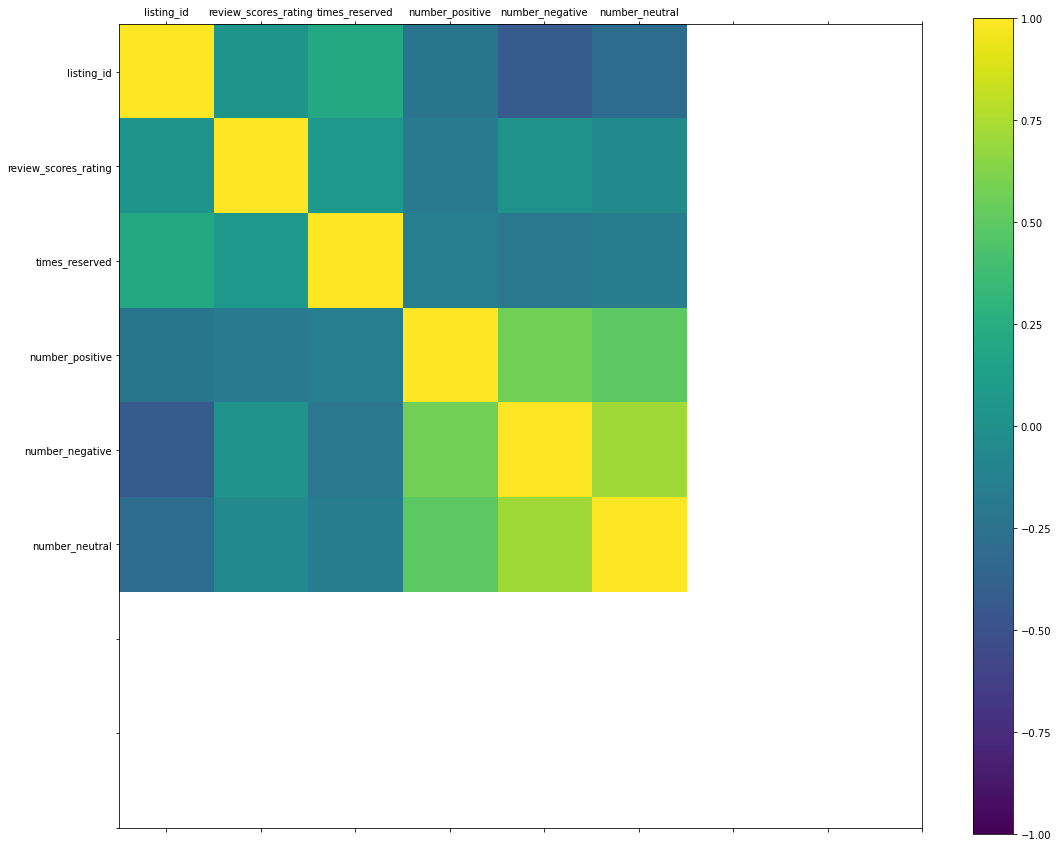

In [ ]:
names = result.columns
correlations = result_blob.corr()
# plot correlation matrix
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

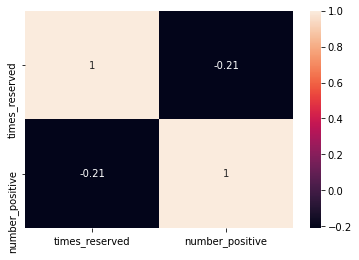

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


df = pd.DataFrame(result_blob,columns=['times_reserved','number_positive'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

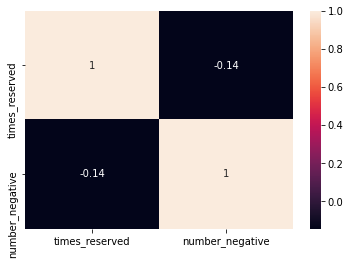

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


df = pd.DataFrame(result_blob,columns=['times_reserved','number_negative'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

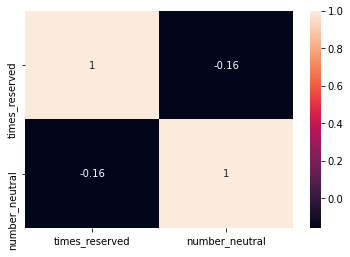

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


df = pd.DataFrame(result_blob,columns=['times_reserved','number_neutral'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

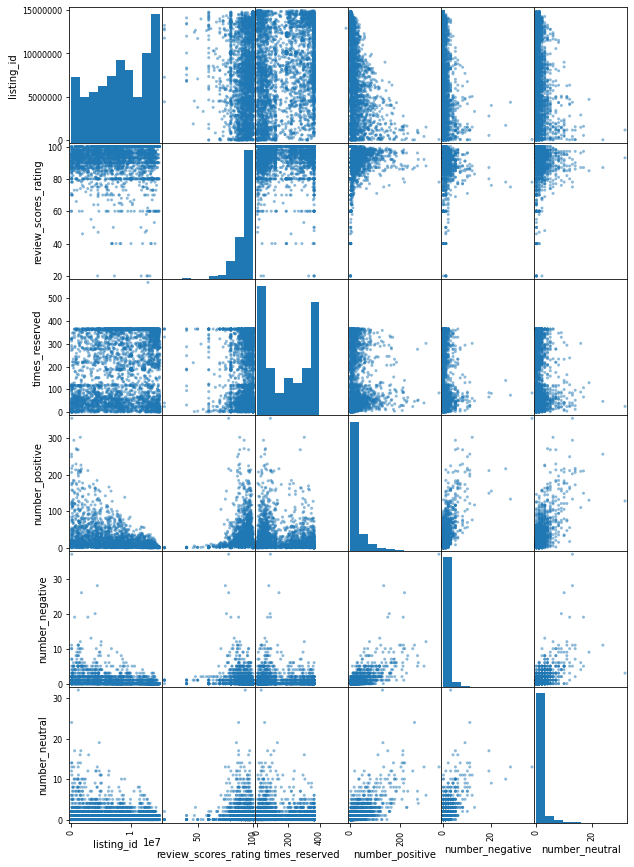

In [ ]:
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix
names = result_blob.columns
scatter_matrix(result, figsize=(10, 15))
plt.show()

In [ ]:
corr=result_blob.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Correlation matrix using Sentiment Class prediction: TextBlob")\
    .set_precision(2)\
    .set_table_styles(magnify())

,listing_id,review_scores_rating,times_reserved,number_negative,number_positive,number_neutral
listing_id,1.00,0.03,0.21,-0.22,-0.42,-0.29
review_scores_rating,0.03,1.00,0.07,-0.18,0.03,-0.05
times_reserved,0.21,0.07,1.00,-0.14,-0.21,-0.16
number_negative,-0.22,-0.18,-0.14,1.00,0.57,0.49
number_positive,-0.42,0.03,-0.21,0.57,1.00,0.71
number_neutral,-0.29,-0.05,-0.16,0.49,0.71,1.00


<font color="#099ffcfc">**Сентимент анализа со TextBlob и Наивен Бесов Класификатор**

In [ ]:
 import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [ ]:
from textblob import TextBlob
# For parsing tweets
import tweepy 

# Importing the NaiveBayesAnalyzer classifier from NLTK
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:

def get_polarity(text):
  return TextBlob(text,analyzer=NaiveBayesAnalyzer()).sentiment.classification

ds_reviews2.comments = ds_reviews2.comments.astype(str)

ds_reviews2['Class'] = ds_reviews2['comments'].apply(get_polarity)

ds_reviews2

<font color="#03254c">Овој дел требаше да ги клсифицира на ист начин податоците како и со обичниот TextBlob, но поради големината на множеството и природата на Наивен Баесов класификатор, за истата работа е потребно многу време. Ние го прекинавме извршувањето по 5 часа.</font>

<font color="#03254c">Како и за моделот со VADER, така и за останатиот модел ги направивме истите визуелизации со цел да видиме дали ќе се добијат слични резултати. Тргнавме со очекувања дека ќе добиеме многу различни резултати, по што бевме изненадени кога добивме скоро идентични резултати и со TextBlob. 

Според ова, **останува заклучокот дека при изборот на апартман за изнајмување на корисниците најмногу им влијаел просечниот рејтинг, што и не е така чудно доколку се земе во предвид мрзеливата природа на луѓето.**</font>

# <font color="#099ffc">Не нагледувано учење со помош на  Universal Sentence Encoder i K-means</font>


---

<font color="#03254c">Откако видовме дека нема лабели, се одлучивме да пробаме да кластерираме со одреден алгоритам за ненадгледувано учење, така што го искористивме Universal Sentence Encoder и K-Means алгоритмот, при што ги визуелизиравме кластерите и опсегот во кој се движат.</font>












In [ ]:
pip install transformers

     |████████████████████████████████| 2.3MB 4.9MB/s 
     |████████████████████████████████| 3.3MB 32.0MB/s 
     |████████████████████████████████| 901kB 31.6MB/s 


In [ ]:
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
logging.set_verbosity(logging.ERROR)

reviews = embed(ds_reviews.pp_text.values)

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(reviews)
clusters = km.labels_.tolist()

In [ ]:
from sklearn.decomposition import PCA
import numpy as np


data = reviews
pca = PCA(2)
 
#Transform the data
df_new = pca.fit_transform(data)

In [ ]:
#Initialize the class object
kmeans = KMeans(n_clusters=3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df_new)
 
#Getting unique labels
u_labels = np.unique(label)
 
labels = kmeans.labels_

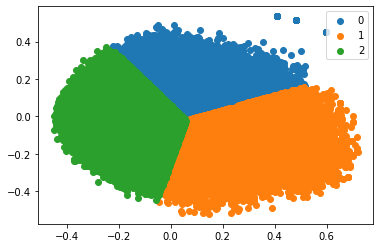

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plotting the results:
for i in u_labels:
    plt.scatter(df_new[label == i , 0] , df_new[label == i , 1] , label = i)
plt.legend()
plt.show()